In [26]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt

In [56]:
def estimate_once(n, d, s0, graph_type, sem_type):
    B_true = utils.simulate_dag(d, s0, graph_type)
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type)
    W_est_notears = linear.notears_linear(X, lambda1=0.1, loss_type='l2')
    r = utils.count_accuracy(B_true, W_est_notears!=0)
    r6 = scipy.spatial.distance.hamming((W_est_notears!=0).reshape([-1,1]), B_true.reshape([-1,1]))
    return r['fdr'], r['tpr'], r['fpr'], r['shd'], r['nnz'], r6
    #print("n, d, s0, graph_type, sem_type", "\n", n, d, s0, graph_type, sem_type, "\n",  utils.count_accuracy(B_true, W_est_notears!=0))

In [75]:
utils.set_random_seed(319)
estimate_once(n=100, d=10, s0=15, graph_type="ER", sem_type="poisson")

(0.0, 0.0, 0.0, 30, 0, 0.3)

In [94]:
import igraph as ig

In [30]:
n, d, s0, graph_type, sem_type = 100, 20, 20, 'ER', 'gauss'
# d (int): num of nodes
# s0 (int): expected num of edges
# graph_type (str): ER, SF, BP
# n (int): num of samples, n=inf mimics population risk
# sem_type (str): gauss, exp, gumbel, uniform, logistic, poisson


In [ ]:
#ds = [10, 20, 50, 100, 500]
ds = [500]
semtypes = ["gauss", "exp", "gumbel", "uniform", "logistic", "poisson"]
result = np.zeros([len(ds)*4*len(semtypes), 11])
result = pd.DataFrame(result, columns=["n", "d", "s0", "graph_type", "sem_type", "fdr", 
                "tpr", "fpr", "shd", "nnz", "hamming"])
count = 0
for dd in range(len(ds)):
    s0s = [1, ds[dd], 2*ds[dd], math.comb(ds[dd], 2)]
    for s in range(4):
        for t in range(len(semtypes)):
            graph_type = 'ER'
            n = 1000
            d = ds[dd]
            s0 = s0s[s]
            sem_type = semtypes[t]
            result.loc[count, 0:5] = n, d, s0, graph_type, sem_type
            result.loc[count, 5:11] = estimate_once(n, d, s0, graph_type, sem_type)
            count += 1
            print( "n, d, s0, graph_type, sem_type", "-", n, d, s0, graph_type, sem_type)
            result.to_csv("./results/ER_result.csv", index=False)


In [90]:
def summarize(graph_type):
    if graph_type == "ER":
        for i in range(30):
            if i == 0:
                result = pd.read_csv("./results/result_"+graph_type+"_"+str(i+200)+".csv")
            else:
                result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(i+200)+".csv")
        result.iloc[:, 5:11] /= 30
    if graph_type == "BP":
        for i in range(15):
            if i == 0:
                result = pd.read_csv("./results/result_"+graph_type+"_"+str(2*i+200)+".csv")
            else:
                result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(2*i+200)+".csv")
        for i in range(20):
            result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(i+300)+".csv")
        result.iloc[:, 5:11] /= 35
    if graph_type == "SF":
        for i in range(15):
            if i == 0:
                result = pd.read_csv("./results/result_"+graph_type+"_"+str(2*i+200)+".csv")
            else:
                result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(2*i+200)+".csv")
        for i in range(20):
            result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(i+300)+".csv")
        result.iloc[:, 5:11] /= 35
    
    return result

In [97]:
def summarize(graph_type):
    for i in range(20):
        if i == 0:
            result = pd.read_csv("./results/result_"+graph_type+"_"+str(i+600)+".csv")
        else:
            result.iloc[:, 5:11] += pd.read_csv("./results/result_"+graph_type+"_"+str(i+600)+".csv")
    result.iloc[:, 5:11] /= 20
    
    return result

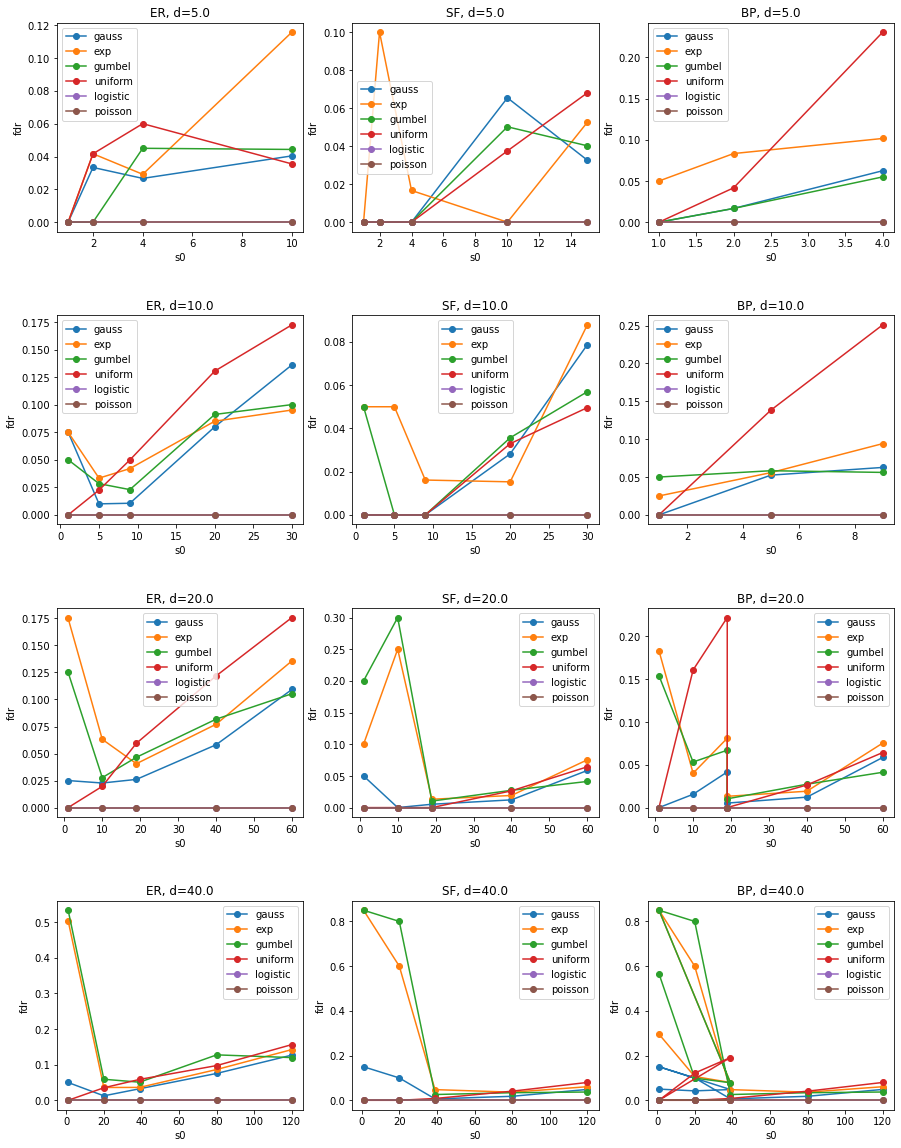

In [101]:
graphtypes = ["ER", "SF", "BP"]
sem_types = ["gauss", "exp", "gumbel", "uniform", "logistic", "poisson"]
ds = result['d'].unique()
ds = np.delete(ds, np.where(ds == 0)[0])
fig, axs = plt.subplots(nrows=len(ds), ncols=len(graphtypes), figsize=(15, 20))
colormap = plt.cm.tab10
for k, graph_type in enumerate(graphtypes):
    result = summarize(graph_type)
    for i, d in enumerate(ds):
        subset = result[result['d'] == d]
        ax = axs[i, k]

        for j, sem_type in enumerate(sem_types):
            sem_subset = subset[subset['sem_type'] == sem_type]
            ax.plot(sem_subset['s0'], sem_subset['fdr'], marker='o', label=sem_type, color=colormap(j))
        ax.set_xlabel('s0')
        ax.set_ylabel('fdr')
        ax.set_title(graph_type + ", " + f'd={d}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()



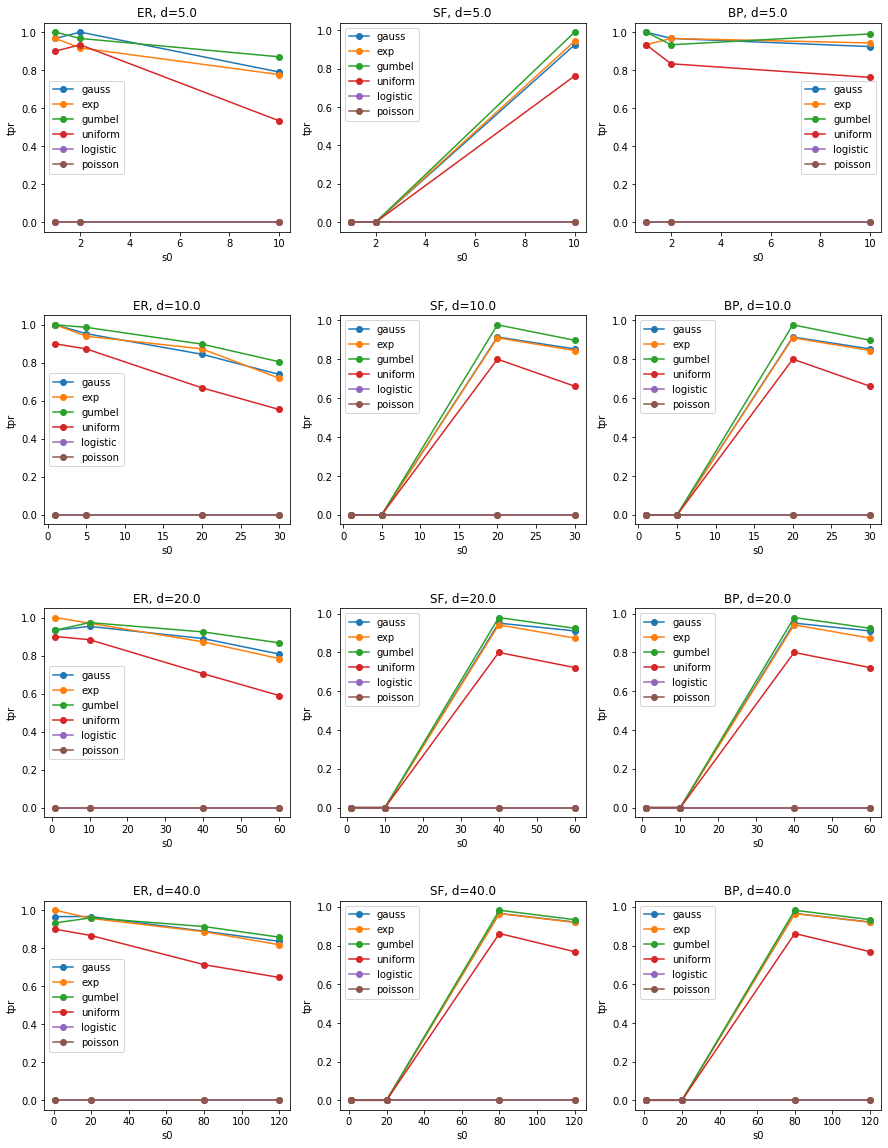

In [87]:
graphtypes = ["ER", "SF", "BP"]
sem_types = ["gauss", "exp", "gumbel", "uniform", "logistic", "poisson"]
ds = result['d'].unique()
ds = np.delete(ds, np.where(ds == 0)[0])
fig, axs = plt.subplots(nrows=len(ds), ncols=len(graphtypes), figsize=(15, 20))
colormap = plt.cm.tab10
for k, graph_type in enumerate(graphtypes):
    result = summarize(graph_type)
    for i, d in enumerate(ds):
        subset = result[result['d'] == d]
        ax = axs[i, k]

        for j, sem_type in enumerate(sem_types):
            sem_subset = subset[subset['sem_type'] == sem_type]
            ax.plot(sem_subset['s0'], sem_subset['tpr'], marker='o', label=sem_type, color=colormap(j))
        ax.set_xlabel('s0')
        ax.set_ylabel('tpr')
        ax.set_title(graph_type + ", " + f'd={d}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()


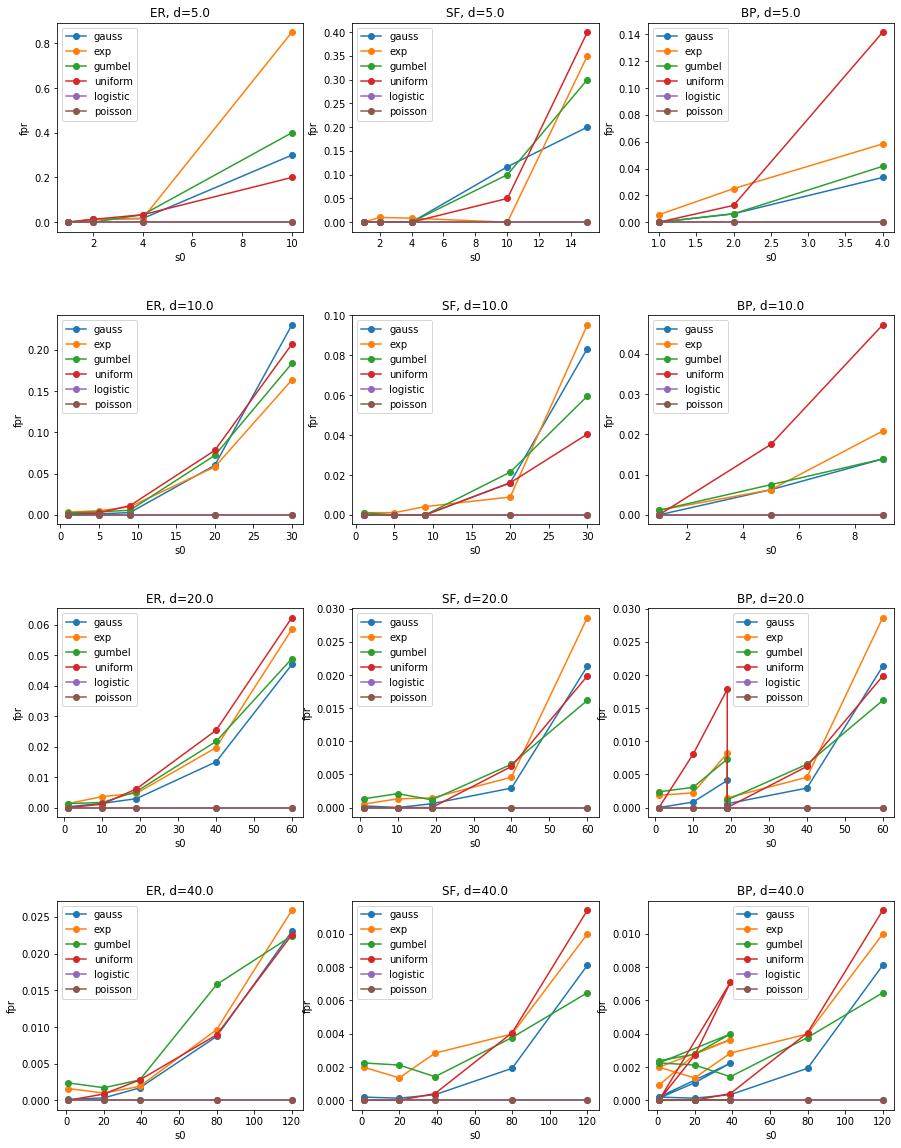

In [99]:
graphtypes = ["ER", "SF", "BP"]
sem_types = ["gauss", "exp", "gumbel", "uniform", "logistic", "poisson"]
ds = result['d'].unique()
ds = np.delete(ds, np.where(ds == 0)[0])
fig, axs = plt.subplots(nrows=len(ds), ncols=len(graphtypes), figsize=(15, 20))
colormap = plt.cm.tab10
for k, graph_type in enumerate(graphtypes):
    result = summarize(graph_type)
    for i, d in enumerate(ds):
        subset = result[result['d'] == d]
        ax = axs[i, k]

        for j, sem_type in enumerate(sem_types):
            sem_subset = subset[subset['sem_type'] == sem_type]
            ax.plot(sem_subset['s0'], sem_subset['fpr'], marker='o', label=sem_type, color=colormap(j))
        ax.set_xlabel('s0')
        ax.set_ylabel('fpr')
        ax.set_title(graph_type + ", " + f'd={d}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()


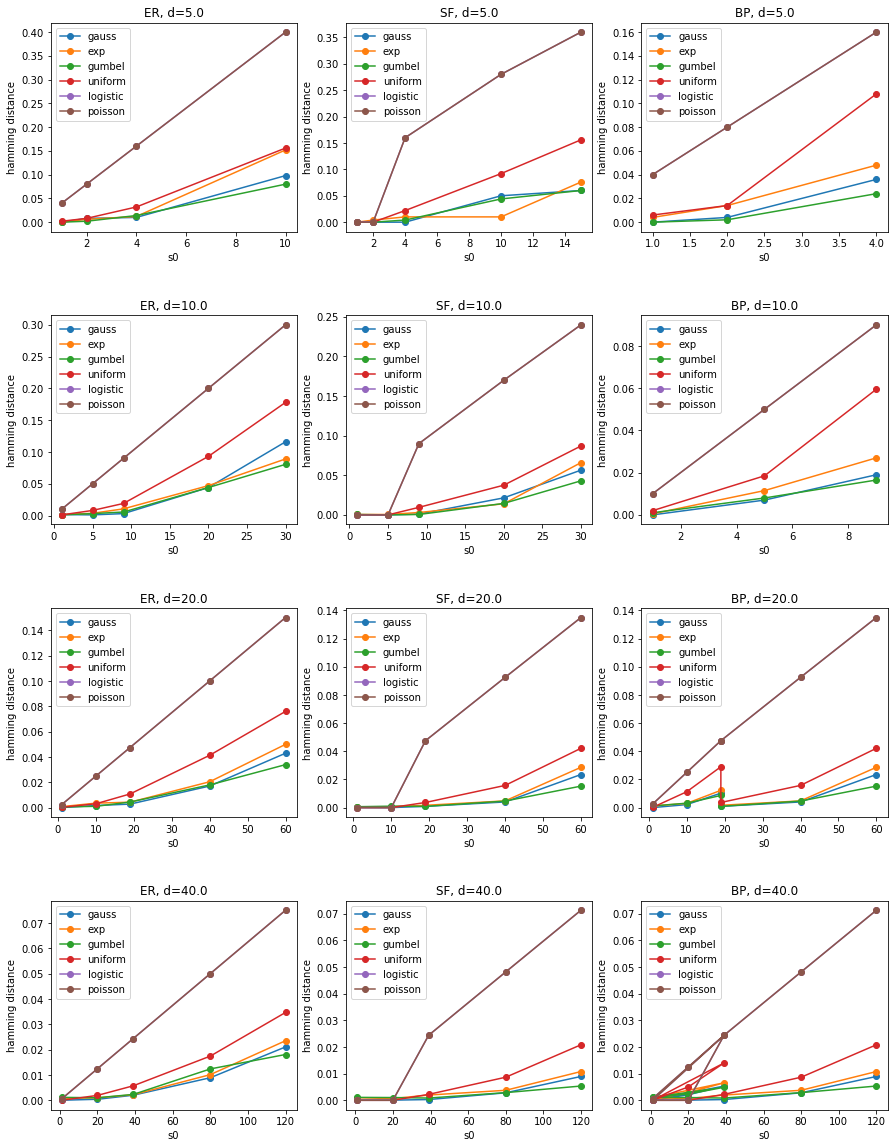

In [100]:
graphtypes = ["ER", "SF", "BP"]
sem_types = ["gauss", "exp", "gumbel", "uniform", "logistic", "poisson"]
ds = result['d'].unique()
ds = np.delete(ds, np.where(ds == 0)[0])
fig, axs = plt.subplots(nrows=len(ds), ncols=len(graphtypes), figsize=(15, 20))
colormap = plt.cm.tab10
for k, graph_type in enumerate(graphtypes):
    result = summarize(graph_type)
    for i, d in enumerate(ds):
        subset = result[result['d'] == d]
        ax = axs[i, k]

        for j, sem_type in enumerate(sem_types):
            sem_subset = subset[subset['sem_type'] == sem_type]
            ax.plot(sem_subset['s0'], sem_subset['hamming'], marker='o', label=sem_type, color=colormap(j))
        ax.set_xlabel('s0')
        ax.set_ylabel('hamming distance')
        ax.set_title(graph_type + ", " + f'd={d}')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()